In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("day7_messy_data.csv")
df

,name,age,salary,department
0,Alice,25,60000,Engineering
1,Bob,,72000,Engineering
2,Charlie,35,81000,HR
3,Diana,28,,Engineering
4,Eddie,40,95000,ENGINEERING
5,Bob,30,72000,Engineering
6,Fiona,27,58000,marketing
7,George,31,62000,Marketing
8,Hannah,29,61000,Marketing
9,Ivan,thirty-two,70000,Engineering


In [4]:
df = df.map(lambda x: x.strip() if isinstance(x,str) else x)
df

,name,age,salary,department
0,Alice,25,60000,Engineering
1,Bob,,72000,Engineering
2,Charlie,35,81000,HR
3,Diana,28,,Engineering
4,Eddie,40,95000,ENGINEERING
5,Bob,30,72000,Engineering
6,Fiona,27,58000,marketing
7,George,31,62000,Marketing
8,Hannah,29,61000,Marketing
9,Ivan,thirty-two,70000,Engineering


In [5]:
df["department"] = df["department"].str.lower()
df

,name,age,salary,department
0,Alice,25,60000,engineering
1,Bob,,72000,engineering
2,Charlie,35,81000,hr
3,Diana,28,,engineering
4,Eddie,40,95000,engineering
5,Bob,30,72000,engineering
6,Fiona,27,58000,marketing
7,George,31,62000,marketing
8,Hannah,29,61000,marketing
9,Ivan,thirty-two,70000,engineering


In [6]:
df["age"] = pd.to_numeric(df["age"], errors = 'coerce')
df

,name,age,salary,department
0,Alice,25.0,60000,engineering
1,Bob,NaN,72000,engineering
2,Charlie,35.0,81000,hr
3,Diana,28.0,,engineering
4,Eddie,40.0,95000,engineering
5,Bob,30.0,72000,engineering
6,Fiona,27.0,58000,marketing
7,George,31.0,62000,marketing
8,Hannah,29.0,61000,marketing
9,Ivan,NaN,70000,engineering


In [7]:
df = df.drop_duplicates()
df


,name,age,salary,department
0,Alice,25.0,60000,engineering
1,Bob,NaN,72000,engineering
2,Charlie,35.0,81000,hr
3,Diana,28.0,,engineering
4,Eddie,40.0,95000,engineering
5,Bob,30.0,72000,engineering
6,Fiona,27.0,58000,marketing
7,George,31.0,62000,marketing
8,Hannah,29.0,61000,marketing
9,Ivan,NaN,70000,engineering


In [8]:
df["age"] = df["age"].fillna(df["age"].median())

In [10]:
df["salary"] = pd.to_numeric(df["salary"], errors = "coerce")
df["salary"] = df["salary"].fillna(df["salary"].mean())

In [11]:
df["department"] = df["department"].str.title()
df

,name,age,salary,department
0,Alice,25.0,60000.0,Engineering
1,Bob,30.0,72000.0,Engineering
2,Charlie,35.0,81000.0,Hr
3,Diana,28.0,69900.0,Engineering
4,Eddie,40.0,95000.0,Engineering
5,Bob,30.0,72000.0,Engineering
6,Fiona,27.0,58000.0,Marketing
7,George,31.0,62000.0,Marketing
8,Hannah,29.0,61000.0,Marketing
9,Ivan,30.0,70000.0,Engineering


In [12]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11 non-null     object 
 1   age         11 non-null     float64
 2   salary      11 non-null     float64
 3   department  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 484.0+ bytes


,name,age,salary,department
0,Alice,25.0,60000.0,Engineering
1,Bob,30.0,72000.0,Engineering
2,Charlie,35.0,81000.0,Hr
3,Diana,28.0,69900.0,Engineering
4,Eddie,40.0,95000.0,Engineering
5,Bob,30.0,72000.0,Engineering
6,Fiona,27.0,58000.0,Marketing
7,George,31.0,62000.0,Marketing
8,Hannah,29.0,61000.0,Marketing
9,Ivan,30.0,70000.0,Engineering


In [13]:
df.describe()


,age,salary
count,11.000000,11.000000
mean,30.727273,69900.000000
std,4.100998,10709.341716
min,25.000000,58000.000000
25%,28.500000,61500.000000
50%,30.000000,69900.000000
75%,32.000000,72000.000000
max,40.000000,95000.000000


In [14]:
df.groupby("department")["salary"].mean()

department
Engineering    73150.000000
Hr             74500.000000
Marketing      60333.333333
Name: salary, dtype: float64

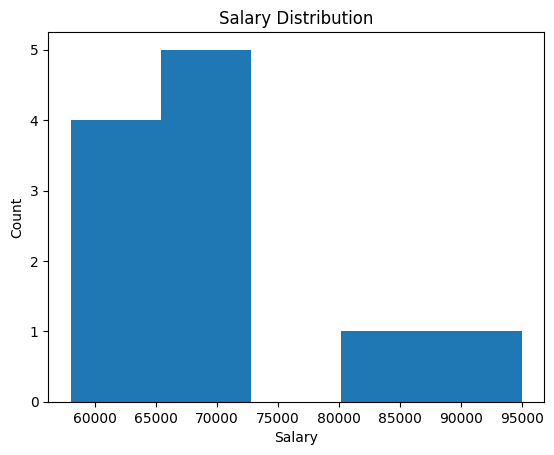

In [15]:
plt.hist(df["salary"], bins = 5)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

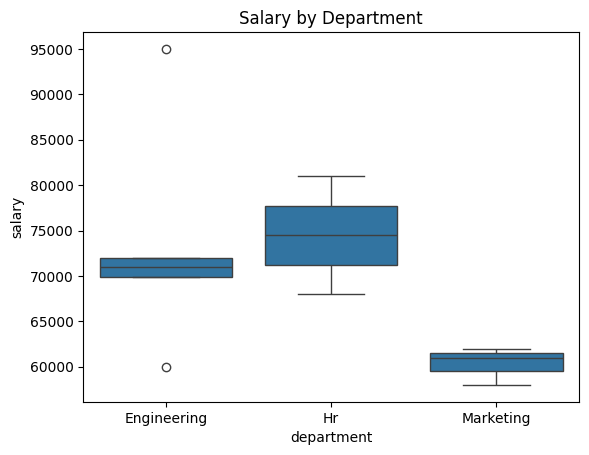

name           object
age           float64
salary        float64
department     object
dtype: object

In [22]:
sns.boxplot(x ="department", y="salary",  data = df)
plt.title("Salary by Department")
plt.show()
df.dtypes

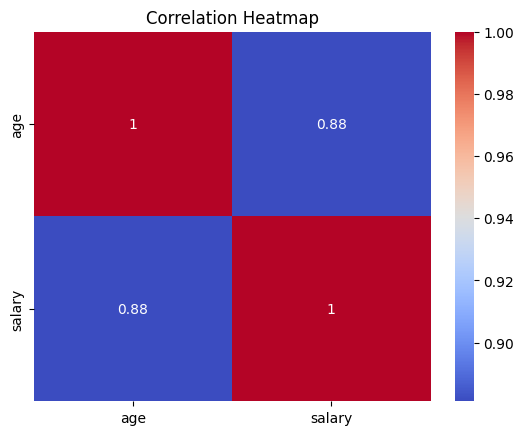

In [24]:
sns.heatmap(df[["age", "salary"]].corr(), annot = True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
